In [240]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from __future__ import division

In [2]:
% matplotlib inline

In [25]:
# Loading the data
data = pd.read_csv('titanic_data.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [42]:
# Statistical description of data

data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [228]:
# How many survived and how many didn't?

survival = data.Survived.value_counts()
survival

0    549
1    342
Name: Survived, dtype: int64

In [229]:
type(survival)

pandas.core.series.Series

In [230]:
survival[0]

549

In [233]:
survival[1]

342

In [234]:
survival[1] + survival[0]

891

In [238]:
# % Survived

percentsurvived = survival[1] / (survival[1] + survival[0])
percentsurvived

0

In [239]:
1 / 5

0

In [29]:
# How many males vs. females?

data.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

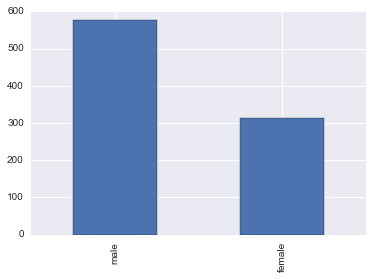

In [84]:
# Distribution of Sex

data.Sex.value_counts().plot(kind='bar')

In [30]:
# How many passenger classes?

data.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

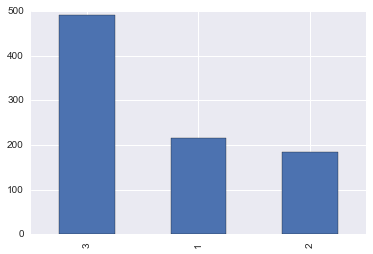

In [86]:
# Distribution of passenger class

data.Pclass.value_counts().plot(kind='bar')

In [88]:
# Distribution of ages

data.Age.value_counts().sort_index().head(20)

0.42      1
0.67      1
0.75      2
0.83      2
0.92      1
1.00      7
2.00     10
3.00      6
4.00     10
5.00      4
6.00      3
7.00      3
8.00      4
9.00      8
10.00     2
11.00     4
12.00     1
13.00     2
14.00     6
14.50     1
Name: Age, dtype: int64

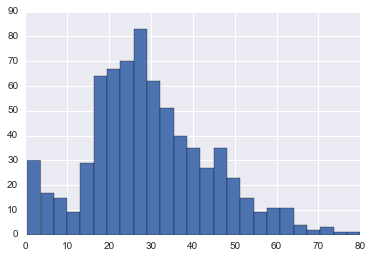

In [72]:
data.Age.hist(bins=25)

#### Passenger Class vs. Survival

In [11]:
pclass_survival_grp = data.groupby(["Pclass", "Survived"]).size()
pclass_survival_grp

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
dtype: int64

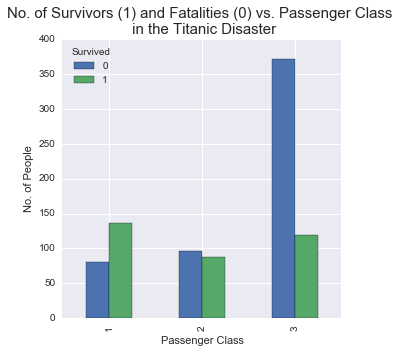

In [90]:
pclass_survival_grp.unstack("Survived").plot(kind="bar", figsize=(5,5))
plt.title("No. of Survivors (1) and Fatalities (0) vs. Passenger Class \n in the Titanic Disaster", fontsize=15)
plt.xlabel("Passenger Class")
plt.ylabel("No. of People")

#### Sex vs. Survival

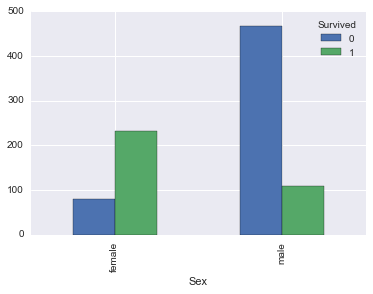

In [100]:
sex_survival_grp = data.groupby(["Sex", "Survived"]).size()
sex_survival_grp.unstack().plot(kind='bar')

#### Survival rate among children ages 0-15:

In [214]:
children = data[data.Age <= 15]
len(children)

83

In [215]:
children.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000
mean,431.602410,0.590361,2.626506,6.369518,1.734940,1.265060,32.785795
std,287.079319,0.494757,0.619024,4.729063,1.638592,0.682255,33.466438
min,8.000000,0.000000,1.000000,0.420000,0.000000,0.000000,7.225000
25%,172.500000,0.000000,2.000000,2.000000,0.000000,1.000000,15.900000
50%,436.000000,1.000000,3.000000,5.000000,1.000000,1.000000,26.250000
75%,706.500000,1.000000,3.000000,9.500000,3.000000,2.000000,32.193750
max,876.000000,1.000000,3.000000,15.000000,5.000000,2.000000,211.337500


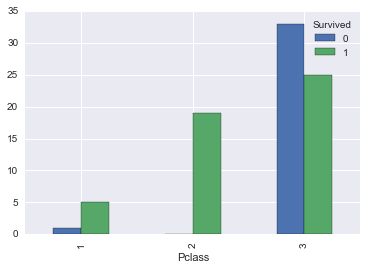

In [216]:
children.groupby(["Pclass", "Survived"]).size().unstack("Survived").plot(kind='bar')

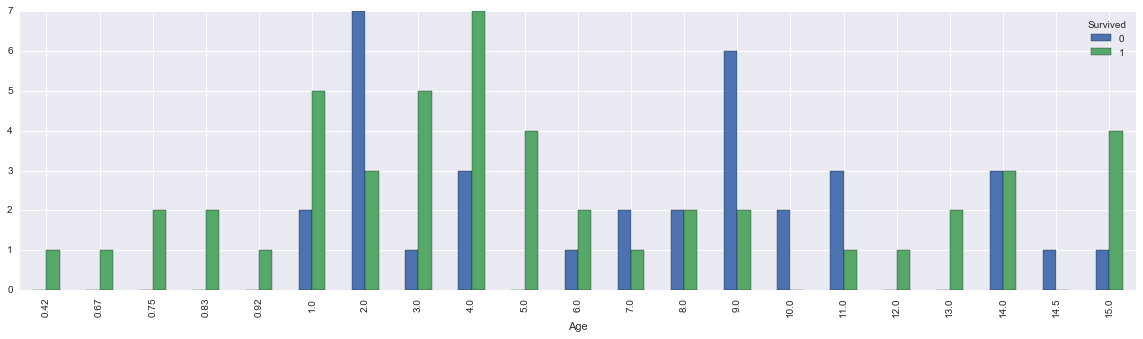

In [217]:
children.groupby(["Age", "Survived"]).size().unstack("Survived").plot(kind='bar', figsize=(20,5))

#### Survival rate among ages 16 - 40:


In [221]:
b = data[(data.Age >= 16) & (data.Age <= 40)]
len(b)

481

In [222]:
b.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000
mean,445.896050,0.386694,2.318087,27.061331,0.361746,0.305613,32.681746
std,257.852311,0.487500,0.806655,6.717040,0.669353,0.772003,57.260690
min,1.000000,0.000000,1.000000,16.000000,0.000000,0.000000,0.000000
25%,225.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,430.000000,0.000000,3.000000,27.000000,0.000000,0.000000,13.000000
75%,672.000000,1.000000,3.000000,32.000000,1.000000,0.000000,27.750000
max,891.000000,1.000000,3.000000,40.000000,5.000000,5.000000,512.329200


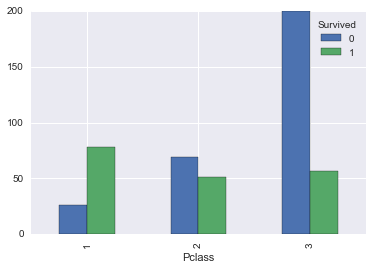

In [223]:
b.groupby(["Pclass", "Survived"]).size().unstack("Survived").plot(kind='bar')

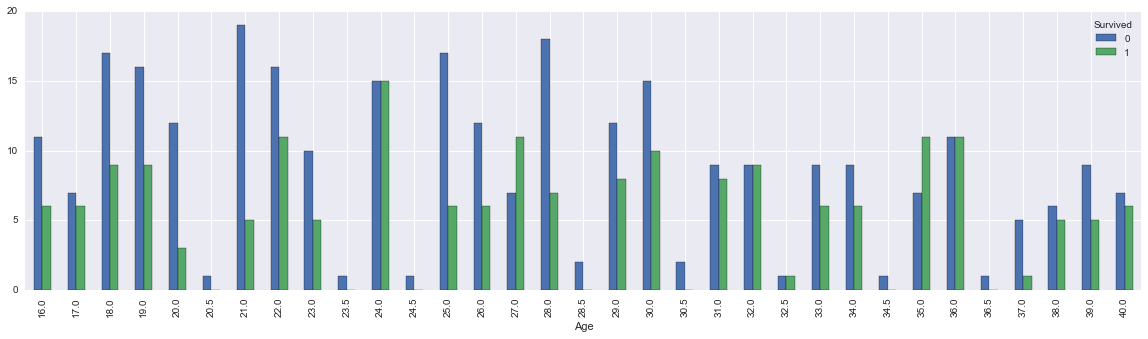

In [224]:
b.groupby(["Age", "Survived"]).size().unstack("Survived").plot(kind='bar', figsize=(20,5))

#### Survival Among Ages 41 and up

In [225]:
c = data[data.Age > 40]

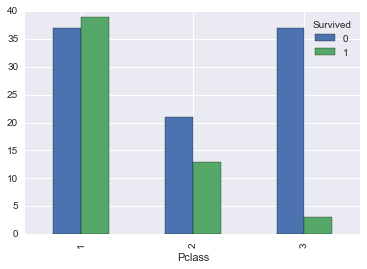

In [226]:
c.groupby(["Pclass", "Survived"]).size().unstack("Survived").plot(kind='bar')

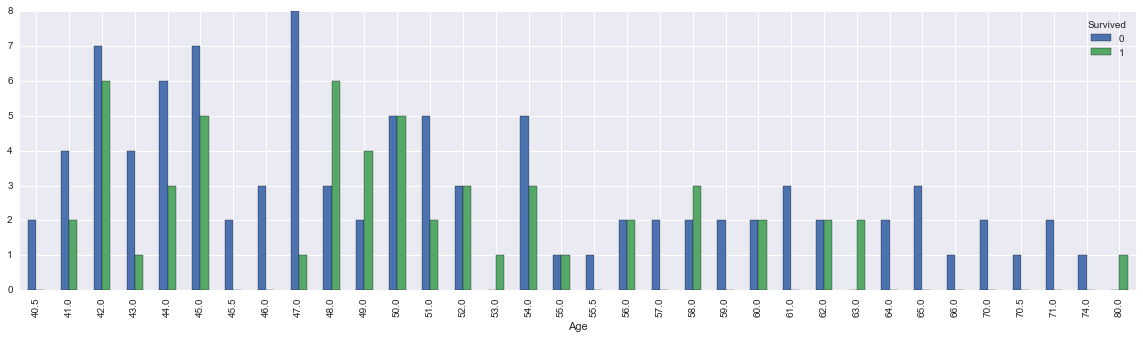

In [227]:
c.groupby(["Age", "Survived"]).size().unstack("Survived").plot(kind='bar', figsize=(20,5))

#### Survival Rate Among Men

In [123]:
male = data[data.Sex == "male"]
male.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


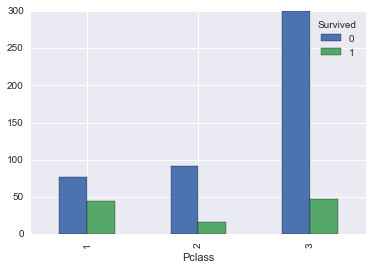

In [124]:
male.groupby(["Pclass", "Survived"]).size().unstack("Survived").plot(kind="bar")

#### Survival Among Women

In [125]:
female = data[data.Sex == "female"]
female.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


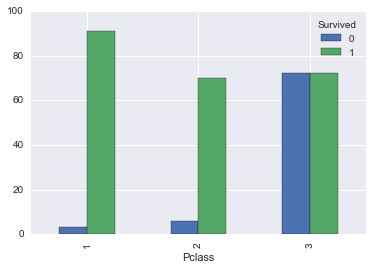

In [126]:
female.groupby(["Pclass", "Survived"]).size().unstack("Survived").plot(kind="bar")

### Survival Factors

In [150]:
s = data.groupby(['Pclass', 'Sex', 'Age', 'Survived']).size()
s

Pclass  Sex     Age   Survived
1       female  2.0   0           1
                14.0  1           1
                15.0  1           1
                16.0  1           3
                17.0  1           2
                18.0  1           3
                19.0  1           3
                21.0  1           2
                22.0  1           4
                23.0  1           2
                24.0  1           5
                25.0  0           1
                26.0  1           1
                29.0  1           1
                30.0  1           5
                31.0  1           2
                32.0  1           1
                33.0  1           3
                35.0  1           6
                36.0  1           3
                38.0  1           3
                39.0  1           4
                40.0  1           2
                41.0  1           1
                42.0  1           1
                43.0  1           1
                44.0  1          

In [158]:
s.unstack('Survived').unstack('Sex')

Survived          0           1     
Sex          female male female male
Pclass Age                          
1      0.92     NaN  NaN    NaN  1.0
       2.00     1.0  NaN    NaN  NaN
       4.00     NaN  NaN    NaN  1.0
       11.00    NaN  NaN    NaN  1.0
       14.00    NaN  NaN    1.0  NaN
       15.00    NaN  NaN    1.0  NaN
       16.00    NaN  NaN    3.0  NaN
       17.00    NaN  NaN    2.0  1.0
       18.00    NaN  1.0    3.0  NaN
       19.00    NaN  2.0    3.0  NaN
       21.00    NaN  1.0    2.0  NaN
       22.00    NaN  1.0    4.0  NaN
       23.00    NaN  NaN    2.0  1.0
       24.00    NaN  2.0    5.0  NaN
       25.00    1.0  NaN    NaN  2.0
       26.00    NaN  NaN    1.0  1.0
       27.00    NaN  1.0    NaN  3.0
       28.00    NaN  2.0    NaN  2.0
       29.00    NaN  2.0    1.0  NaN
       30.00    NaN  1.0    5.0  NaN
       31.00    NaN  2.0    2.0  1.0
       32.00    NaN  NaN    1.0  1.0
       33.00    NaN  1.0    3.0  NaN
       34.00    NaN  NaN    NaN  1.0
       35.00    NaN  NaN    6.0  3.0
       36.00    NaN  2.0    3.0  4.0
       37.00    NaN  2.0    NaN  1.0
       38.00    NaN  2.0    3.0  1.0
       39.00    NaN  1.0    4.0  NaN
       40.00    NaN  2.0    2.0  1.0
...             ...  ...    ...  ...
3      31.00    2.0  2.0    2.0  1.0
       32.00    1.0  6.0    NaN  5.0
       33.00    NaN  7.0    1.0  NaN
       34.00    NaN  4.0    NaN  NaN
       34.50    NaN  1.0    NaN  NaN
       35.00    NaN  5.0    1.0  NaN
       36.00    NaN  5.0    1.0  NaN
       37.00    1.0  1.0    NaN  NaN
       38.00    NaN  3.0    1.0  NaN
       39.00    2.0  3.0    NaN  1.0
       40.00    1.0  4.0    NaN  NaN
       40.50    NaN  2.0    NaN  NaN
       41.00    2.0  2.0    NaN  NaN
       42.00    NaN  4.0    NaN  NaN
       43.00    1.0  2.0    NaN  NaN
       44.00    NaN  3.0    NaN  1.0
       45.00    3.0  1.0    NaN  1.0
       45.50    NaN  1.0    NaN  NaN
       47.00    1.0  2.0    NaN  NaN
       48.00    1.0  1.0    NaN  NaN
       49.00    NaN  1.0    NaN  NaN
       50.00    NaN  1.0    NaN  NaN
       51.00    NaN  3.0    NaN  NaN
       55.50    NaN  1.0    NaN  NaN
       59.00    NaN  1.0    NaN  NaN
       61.00    NaN  1.0    NaN  NaN
       63.00    NaN  NaN    1.0  NaN
       65.00    NaN  1.0    NaN  NaN
       70.50    NaN  1.0    NaN  NaN
       74.00    NaN  1.0    NaN  NaN

[182 rows x 4 columns]

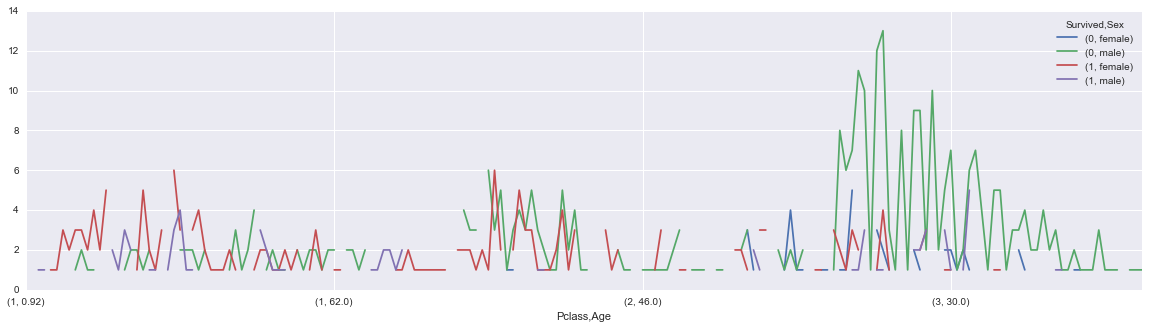

In [162]:
s.unstack('Survived').unstack('Sex').plot(figsize=(20,5))

#### Among 3rd class passengers, what is the factor that most affects survival?

In [164]:
thirdclass = data[data.Pclass == 3]
thirdclass.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [191]:
thirdclass.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,491.000000,491.000000,491.0,355.000000,491.000000,491.000000,491.000000
mean,439.154786,0.242363,3.0,25.140620,0.615071,0.393075,13.675550
std,264.441453,0.428949,0.0,12.495398,1.374883,0.888861,11.778142
min,1.000000,0.000000,3.0,0.420000,0.000000,0.000000,0.000000
25%,200.000000,0.000000,3.0,18.000000,0.000000,0.000000,7.750000
50%,432.000000,0.000000,3.0,24.000000,0.000000,0.000000,8.050000
75%,666.500000,0.000000,3.0,32.000000,1.000000,0.000000,15.500000
max,891.000000,1.000000,3.0,74.000000,8.000000,6.000000,69.550000


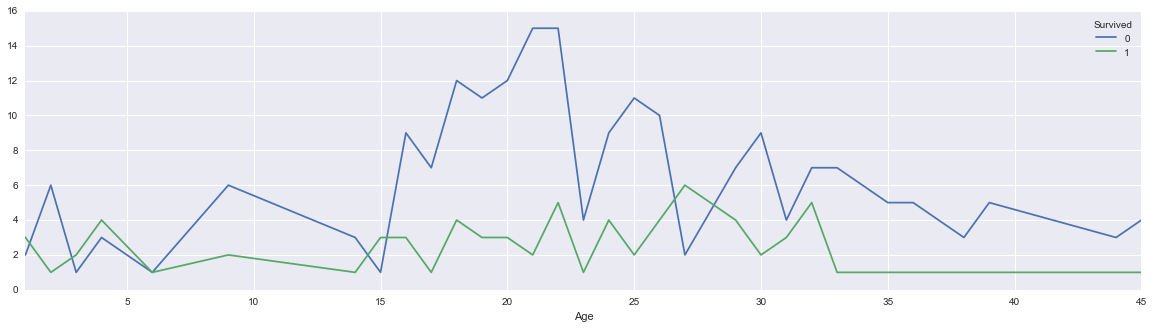

In [193]:
thirdclass.groupby(["Age", "Survived"]).size().unstack("Survived").dropna().plot(figsize=(20,5))

In [200]:
thirdclass.groupby(["Sex", "Survived"]).size()

Sex     Survived
female  0            72
        1            72
male    0           300
        1            47
dtype: int64